# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Portuguese Bank Marketing Data Set](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Quick Look Using Pandas Profiling](#2.6.1_Quick_Look_Using_Pandas_Profiling)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      

## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting the data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

A Portuguese banking institution wants a model that predicts whether a given customer will subscribe to a term deposit service offered by the bank.

## 2.3 Imports<a id='2.3_Imports'></a>

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling

## 2.4 Objectives<a id='2.4_Objectives'></a>

This data wrangling step is ment to answer some fundamental questions before moving on with the analysis. These questions are:

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?


## 2.5 Load Portuguese Bank Marketing Data Set<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [12]:
# Loading the full CSV data file 
bank_data = pd.read_csv('../data/raw/bank-additional/bank-additional-full.csv', sep=";")

In [94]:
# bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs)
bank = pd.read_csv('../data/raw/bank/bank.csv', sep=";")

In [95]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [104]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.assign(match=df.duplicated(subset=['id', 'type', 'min', 'max']))

In [50]:
#Call the info method on ski_data to see a summary of the data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [51]:
bank_data.shape

(41188, 21)

The data set contains 21 columns with 41188 observations and it does not seem to have a missing values. We need to inspect each column to see if there is an issue with the data.  The following work uses the full data set, "bank_data"

In [53]:
# Checking missing data
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [52]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [14]:
bank_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [19]:
bank_data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Quick Look Using Pandas Profiling<a id='2.6.1_Quick_Look_Using_Pandas_Profiling'></a>

In [39]:
# Data profiling, generating html report.
profile_report = bank_data.profile_report(explorative=True, html={'style': {'full_width': True}})
profile_report

The data contains 10 Numerical variables, 10 Categorical variables and one Boolean variable which is the target variable (y) takes ‘yes’ or ‘no’.  The target variable represents, y - has the client subscribed a term deposit? (binary: 'yes','no')

Some outcomes to watch from Pandas Profiling report:
Warnings
* Dataset has 12 (< 0.1%) duplicate rows

* The variable "euribor3m" is highly correlated with "emp.var.rate" and 

* The variable "nr.employed" is highly correlated with "emp.var.rate" and 

* The variable previous has 35563 (86.3%) zeros

Each variable will be inspected for finding issues, if any, in the following work.


### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [71]:
# Viewing categorical data
bank_data.select_dtypes(include=[object]).head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

**The number of unique values for each categorical feature**

In [81]:
cols = bank_data.select_dtypes(include=[object]).columns
cat_counts = bank_data[cols].nunique()
cat_counts

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

**Calculate the distribution of the values of the categorical variables.**

In [144]:
def categories_counts(feature):
    ''' Calculates the count and percentage of each value of a categorical variable'''
    counts = pd.concat([bank_data[feature].value_counts(), round(100 * bank_data[feature].value_counts()/bank_data.shape[0], 2)], axis=1)
    counts.columns=['count', '%']
    counts.reset_index(inplace =True)
    counts.rename(columns={'index': feature}, inplace=True)
    return counts

In [162]:
def bar_plot(col1, col2 = ''):
    '''Generates 1 or 2 horizontal bar charts for the passed columns' names, side by side if 2 columns passed'''
    if col2:
        #Create two subplots on 1 row and 2 columns with a figsize of (14, 8)
        fig, ax = plt.subplots(1, 2, figsize=(14, 8))
        # calculate value counts
        #col1_counts = bank_data.col1
        #Specify a horizontal barplot ('barh') as kind of plot (kind=)
        bank_data[col1].value_counts().plot(kind='barh', ax=ax[0])
        #Give the plot a helpful title
        ax[0].set_title(col1.capitalize())
        #Label the xaxis 'Count'
        ax[0].set_xlabel('Count')
        #Specify a horizontal barplot ('barh') as kind of plot (kind=)
        bank_data[col2].value_counts().plot(kind='barh', ax=ax[1])
        #Give the plot a helpful title
        ax[1].set_title(col2.capitalize())
        #Label the xaxis 'Count'
        ax[1].set_xlabel('Count')
        #Give the subplots a little "breathing room" with a wspace of 0.5
        plt.subplots_adjust(wspace=0.5);
        #You're encouraged to explore a few different figure sizes, orientations, and spacing here
        # as the importance of easy-to-read and informative figures is frequently understated
        # and you will find the ability to tweak figures invaluable later on
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        bank_data[col1].value_counts().plot(kind='barh', ax=ax)
        #Give the plot a helpful title
        ax.set_title(col1.capitalize())
        #Label the xaxis 'Count'
        ax.set_xlabel('Count')
        

## 2.6.3.1 The Target Variable (y)

In [163]:
# Change the name of y to subscribed
bank_data.rename(columns={'y': 'subscribed'}, inplace=True)

In [164]:
categories_counts('subscribed')

subscribed  count      %
0         no  36548  88.73
1        yes   4640  11.27

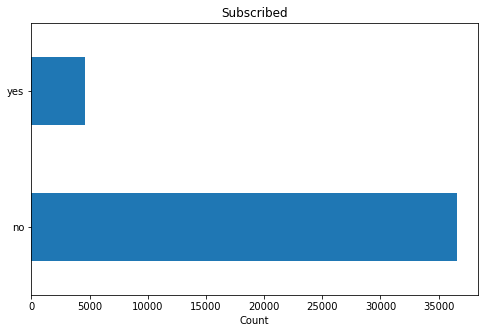

In [165]:
bar_plot('subscribed')

**Important notice**: There is unblanced values of the target variable **"subscribed"**. Only **11.27%** of the customers subscribed.

## 2.6.3.2 The Job and Education Variables

In [166]:
categories_counts('job')

job  count      %
0          admin.  10422  25.30
1     blue-collar   9254  22.47
2      technician   6743  16.37
3        services   3969   9.64
4      management   2924   7.10
5         retired   1720   4.18
6    entrepreneur   1456   3.54
7   self-employed   1421   3.45
8       housemaid   1060   2.57
9      unemployed   1014   2.46
10        student    875   2.12
11        unknown    330   0.80

There are 330 missing values in the job feature, which represents 0.80% of the number of observations. The missing values are labled as 'unknown'.

In [167]:
categories_counts('education')

education  count      %
0    university.degree  12168  29.54
1          high.school   9515  23.10
2             basic.9y   6045  14.68
3  professional.course   5243  12.73
4             basic.4y   4176  10.14
5             basic.6y   2292   5.56
6              unknown   1731   4.20
7           illiterate     18   0.04

There are 1731 missing values in the education feature, which represents 4.20% of the number of observations. The missing values are labled as 'unknown'.

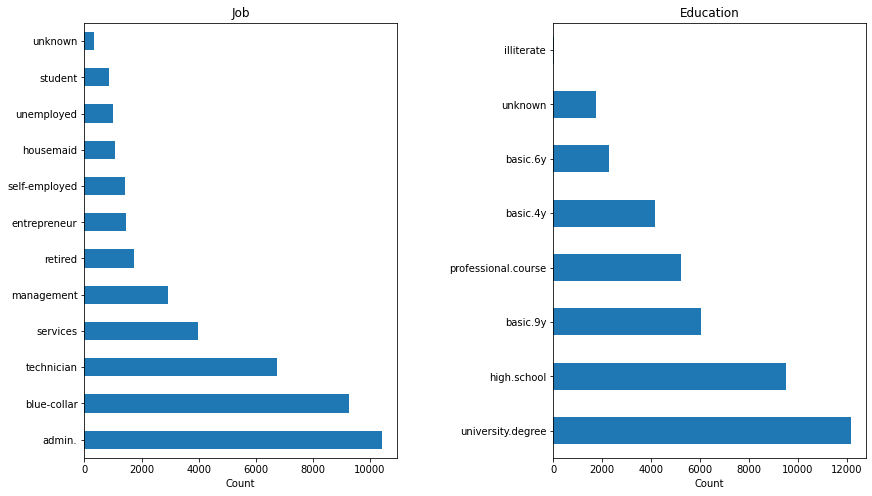

In [168]:
bar_plot('job', 'education')

## 2.6.3.3 The Default and Loan Variables

In [170]:
categories_counts('default')

default  count      %
0       no  32588  79.12
1  unknown   8597  20.87
2      yes      3   0.01

**20.87%** of the default values are missing. Also, only 3 cases, **0.01%** reported default.

In [171]:
categories_counts('loan')

loan  count      %
0       no  33950  82.43
1      yes   6248  15.17
2  unknown    990   2.40

**2.40%** of the loan values are missing. Also, **15.17%** reported yes for loan.

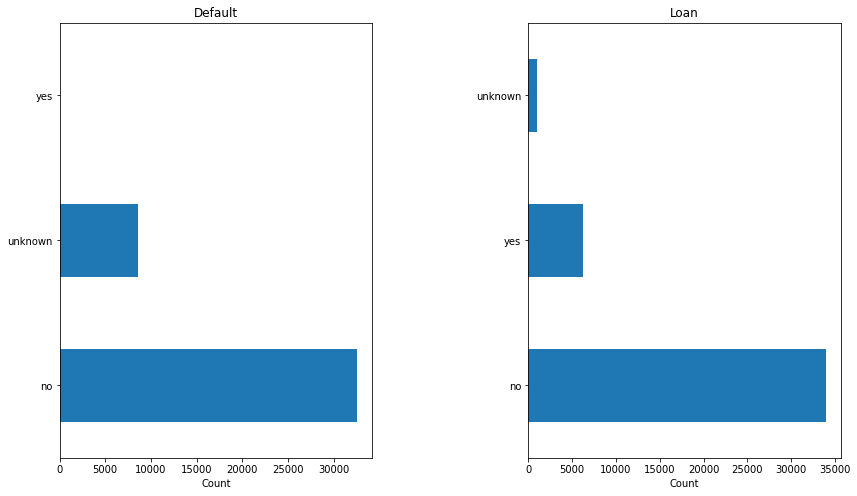

In [48]:
bar_plot('default', 'loan')

In [172]:
categories_counts('housing')

housing  count      %
0      yes  21576  52.38
1       no  18622  45.21
2  unknown    990   2.40

**2.40%** of the housing variable is missing. The housing variable indicates weat of has housing?

In [175]:
categories_counts('marital')

marital  count      %
0   married  24928  60.52
1    single  11568  28.09
2  divorced   4612  11.20
3   unknown     80   0.19

In [338]:
categories_counts('poutcome')

poutcome  count      %
0  nonexistent  35563  86.34
1      failure   4252  10.32
2      success   1373   3.33

In [339]:
categories_counts('contact')

contact  count      %
0   cellular  26144  63.47
1  telephone  15044  36.53

In [340]:
categories_counts('month')

month  count      %
0   may  13769  33.43
1   jul   7174  17.42
2   aug   6178  15.00
3   jun   5318  12.91
4   nov   4101   9.96
5   apr   2632   6.39
6   oct    718   1.74
7   sep    570   1.38
8   mar    546   1.33
9   dec    182   0.44

In [341]:
categories_counts('day_of_week')

day_of_week  count      %
0         thu   8623  20.94
1         mon   8514  20.67
2         wed   8134  19.75
3         tue   8090  19.64
4         fri   7827  19.00

In [180]:
cols = bank_data.select_dtypes(include=[object]).columns
cat_counts = bank_data[cols].nunique()
cat_counts

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
subscribed      2
dtype: int64

In [337]:
c = pd.DataFrame()
k = []
for var in cat_counts.index:
    count = categories_counts(var)
    count['idx'] = var
    count.rename(columns= {var:'categories'}, inplace=True)
    print(count)
    c.append(count)


       categories  count      %  idx
0          admin.  10422  25.30  job
1     blue-collar   9254  22.47  job
2      technician   6743  16.37  job
3        services   3969   9.64  job
4      management   2924   7.10  job
5         retired   1720   4.18  job
6    entrepreneur   1456   3.54  job
7   self-employed   1421   3.45  job
8       housemaid   1060   2.57  job
9      unemployed   1014   2.46  job
10        student    875   2.12  job
11        unknown    330   0.80  job
  categories  count      %      idx
0    married  24928  60.52  marital
1     single  11568  28.09  marital
2   divorced   4612  11.20  marital
3    unknown     80   0.19  marital
            categories  count      %        idx
0    university.degree  12168  29.54  education
1          high.school   9515  23.10  education
2             basic.9y   6045  14.68  education
3  professional.course   5243  12.73  education
4             basic.4y   4176  10.14  education
5             basic.6y   2292   5.56  education
6  

In [280]:
c = pd.DataFrame()
for var in cat_counts.index:
    c= (categories_counts(var))

In [281]:

c['idx'] = c.columns[0]

In [285]:
c.set_index(['idx', 'subscribed']).sort_index()

count      %
idx        subscribed              
subscribed no          36548  88.73
           yes          4640  11.27

In [277]:
c.columns[0]

'index'

In [269]:
 k = list(c.iloc[:,0])

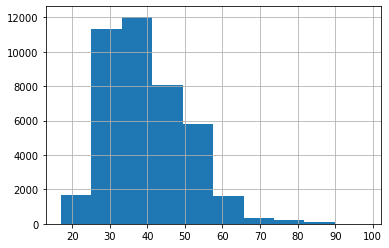

In [57]:
bank_data['age'].hist(bins=10);